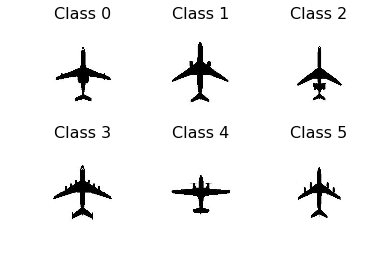

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

qtyTrainData = 5

# Print classes

for classNumber in range(0, 6):
    img_path = "../Data/aircraft-"+str(classNumber)+"/0.jpg"
    img = cv2.imread(img_path)
    plt.subplot(2, 3, classNumber+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Class " + str(classNumber), fontsize=16)

In [19]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def showConvexHull(hull, classNumber):
    points = []
    
    for contour in hull:
        for point in contour:
            if(point[0][0]!=0 and point[0][0]!=199 and point[0][1]!=0 and point[0][1]!=199):
                points.append([point[0][0], point[0][1]])
    
    indexhull = ConvexHull(points)
    #print(hull.simplices) #print indexes
    

    for simplex in indexhull.simplices:
        plt.plot([points[simplex[0]][0], points[simplex[1]][0]], [points[simplex[0]][1], points[simplex[1]][1]], 'r-')


In [20]:
def refineConvexhull(hull):
    '''
    This function remove errors on the convex hull and return the convex hull ordered points 
    '''
    points = []
    
    #----- Calculate convex hull points -----#
    for contour in hull:
        for point in contour:
            if(point[0][0]!=0 and point[0][0]!=199 and point[0][1]!=0 and point[0][1]!=199):
                points.append([point[0][0], point[0][1]])
    
    indexhull = ConvexHull(points)
    
    n = 0
    hullPoints = []

    for simplex in indexhull.simplices:
        hullPoints.append([points[simplex[0]][0], points[simplex[0]][1]])
        n=n+1
        
    
    #----- Center point -----#
    centerPoint = [0,0]
    
    for hullPoint in hullPoints:
        centerPoint[0]+= hullPoint[0]
        centerPoint[1]+= hullPoint[1]
        
    centerPoint[0]/=n
    centerPoint[1]/=n
    
    #print("Center point: (",centerPoint[0],",",centerPoint[1],")\n");
    #----- Sort points around center point -----#
    angles = [None] * n
    for i in range(0, n):
        angles[i] = math.atan2(hullPoints[i][1]-centerPoint[1], hullPoints[i][0]-centerPoint[0]);
    
    # Bubble sort
    for i in range(0, n):
        for j in range(0, n):
            if(angles[j]>=angles[i]):
                tempAngle = angles[i]
                tempPoint = hullPoints[i]
                
                hullPoints[i] = hullPoints[j]
                angles[i] = angles[j]
                hullPoints[j] = tempPoint
                angles[j] = tempAngle
                
    return n,hullPoints

In [21]:
def calcAreaAircraft(img):
    totalNumPixels = 40000
    numBlackPixels = 0
    cont = 0
    for i in thresh:
        for j in i:
            cont=cont+1
            if(j==0):
                numBlackPixels=numBlackPixels+1
                
    return numBlackPixels/totalNumPixels*100

In [22]:
import math

def calcAreaConvexhull(hull):
    n, hullPoints = refineConvexhull(hull)
    
    #----- Calculate area -----#
    area = 0.0
    
    # Calculate value of shoelace formula 
    j = n - 1
    for i in range(0,n):
        #if( i%2 == True):
            #print("Point: (",hullPoints[i][0],",",hullPoints[i][1],")\n");
        area += (hullPoints[j][0] + hullPoints[i][0]) * (hullPoints[j][1] - hullPoints[i][1])
        j = i   # j is previous vertex to i 
        
      
    return abs(0.5*area/40000*100)
    

Class  0 AirCraft: 5.38% ConvexHull: 16.70%
Class  0 AirCraft: 7.66% ConvexHull: 23.37%
Class  0 AirCraft: 5.37% ConvexHull: 16.96%
Class  0 AirCraft: 6.65% ConvexHull: 20.47%
Class  0 AirCraft: 6.44% ConvexHull: 19.58%
Class  1 AirCraft: 6.40% ConvexHull: 19.04%
Class  1 AirCraft: 9.21% ConvexHull: 26.35%
Class  1 AirCraft: 6.42% ConvexHull: 18.93%
Class  1 AirCraft: 8.04% ConvexHull: 23.45%
Class  1 AirCraft: 7.77% ConvexHull: 22.82%
Class  2 AirCraft: 4.45% ConvexHull: 12.28%
Class  2 AirCraft: 6.40% ConvexHull: 12.07%
Class  2 AirCraft: 4.47% ConvexHull: 12.52%
Class  2 AirCraft: 5.59% ConvexHull: 14.93%
Class  2 AirCraft: 5.38% ConvexHull: 14.41%
Class  3 AirCraft: 6.16% ConvexHull: 17.79%
Class  3 AirCraft: 8.79% ConvexHull: 25.26%
Class  3 AirCraft: 6.17% ConvexHull: 17.97%
Class  3 AirCraft: 7.66% ConvexHull: 21.99%
Class  3 AirCraft: 7.38% ConvexHull: 21.31%
Class  4 AirCraft: 4.92% ConvexHull: 12.90%
Class  4 AirCraft: 7.12% ConvexHull: 17.95%
Class  4 AirCraft: 5.00% ConvexH

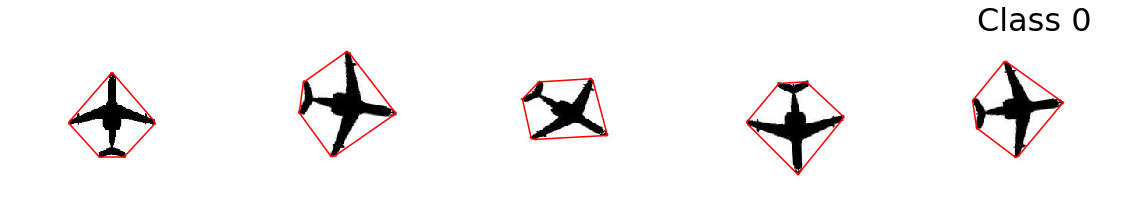

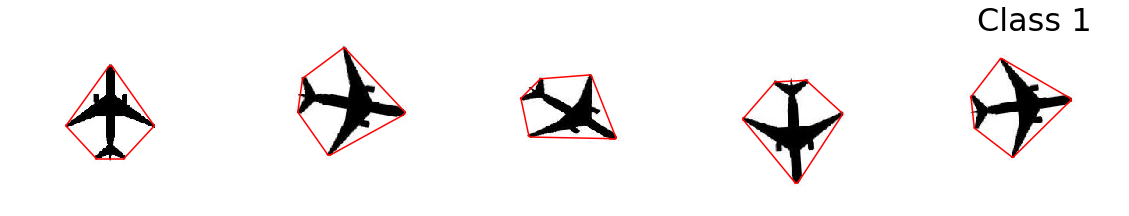

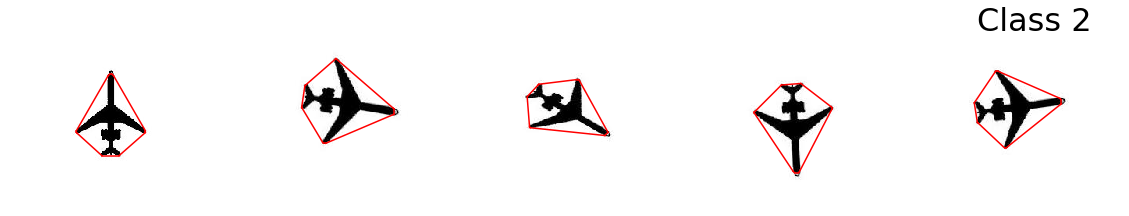

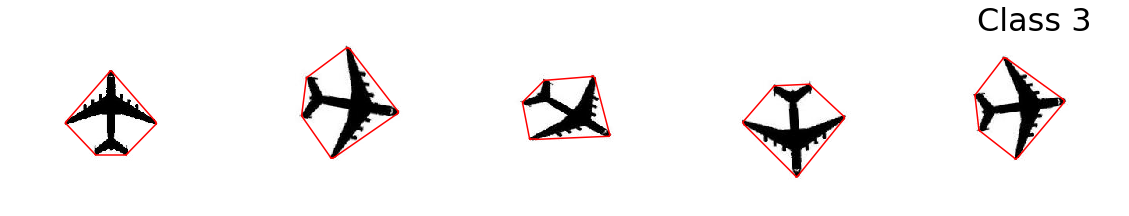

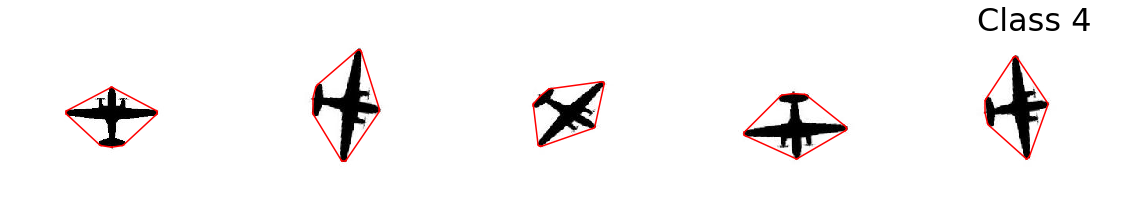

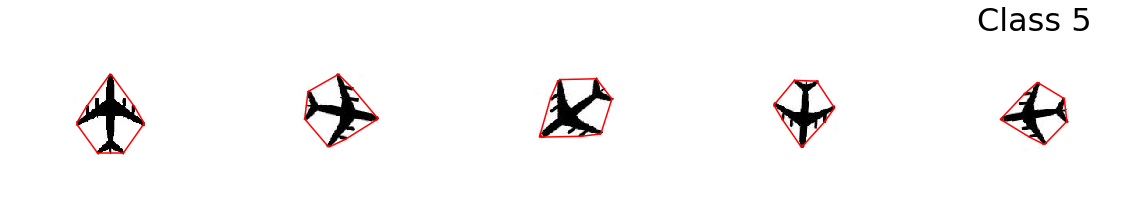

In [23]:
#----------- Write to outputFile -----------#
import csv

header = ['Class', ' AreaAirplane', ' AreaConvexHull']
with open('trainData.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(header)
csvFile.close() 
    
for classNumber in range(0, 6):
    plt.figure(classNumber, figsize=(20, 20))
    for trainDataNumber in range(0,qtyTrainData):
        img_path = "../Data/aircraft-"+str(classNumber)+"/"+str(trainDataNumber)+".jpg"
        img = cv2.imread(img_path)
        
        #----------- Generate Convex hull -----------#
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.blur(gray, (3, 3))
        #binarize the image
        ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
        # Finding contours for the binarized
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        # create hull array for convex hull points
        hull = []
        convexityDefects = [] 

        # calculate points for each contour
        for i in range(len(contours)):
            # creating convex hull object for each contour
            hull.append(cv2.convexHull(contours[i], False))

        # create an empty black image
        drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

        
        # draw contours and hull points, and find convexity defects
        for i in range(len(contours)):
            color_contours = (0, 255, 0) # green - color for contours
            color = (0, 0, 255) # blue - color for convex hull
            cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
            
        #---------------- Show data ---------------#
        plt.subplot(6, qtyTrainData, trainDataNumber+1)
        showConvexHull(hull, classNumber)
        plt.imshow(img) # Uncommment this line to see the plane img
        plt.axis("off")
        
        #------------- Calculate areas ------------#
        
        areaAircraft = calcAreaAircraft(thresh)
        areaConvexhull = calcAreaConvexhull(hull)
        
        print("Class ", classNumber, "AirCraft:", "%.2f%%" % areaAircraft, "ConvexHull:", "%.2f%%" %areaConvexhull)
        
        #----------- Update output file -----------#
        row = [str(classNumber), "%.2f"%areaAircraft, "%.2f"%areaConvexhull]
        with open('areaRatioData.csv', 'a') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(row)
        
    plt.title("Class " + str(classNumber), fontsize=32)
    
csvFile.close() 